In [263]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [264]:
df_books = pd.read_csv(r"C:\Users\Vinay Mishra\Desktop\Excel Project\Data Copy\Books.csv")

<ipython-input-264-fa8527e99db5>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv(r"C:\Users\Vinay Mishra\Desktop\Excel Project\Data Copy\Books.csv")


In [265]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [266]:
df_ratings = pd.read_csv(r"C:\Users\Vinay Mishra\Desktop\Excel Project\Data Copy\Ratings.csv")

In [267]:
df_ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [268]:
df_user = pd.read_csv(r"C:\Users\Vinay Mishra\Desktop\Excel Project\Data Copy\Users.csv")

In [269]:
df_user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [270]:
#filling the missing values with 'Unknown'
df_books['Book-Author'].fillna('Unknown',inplace=True)

In [271]:
def change_title(str1,str2):
  '''Change the title of books'''
  str1 = str1 +" "+'by' +" "+str2
  return str1

In [272]:
df_books.shape

(271360, 8)

In [273]:
# Create a new column for title
df_books['new_title'] = df_books.apply(lambda x : change_title(x['Book-Title'],x['Book-Author']),axis = 1)

In [274]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Classical Mythology by Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,Decision in Normandy by Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,The Mummies of Urumchi by E. J. W. Barber
...,...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,There's a Bat in Bunk Five by Paula Danziger
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,From One to One Hundred by Teri Sloat
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,Lily Dale : The True Story of the Town that Ta...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,Republic (World's Classics) by Plato


In [275]:
# Get rid of duplications
df_books = df_books.drop_duplicates(subset='new_title',keep='first')

In [276]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Classical Mythology by Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,Clara Callan by Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,Decision in Normandy by Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,The Mummies of Urumchi by E. J. W. Barber
...,...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,Flashpoints: Promise and Peril in a New World ...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,From One to One Hundred by Teri Sloat
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,Lily Dale : The True Story of the Town that Ta...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,Republic (World's Classics) by Plato


In [277]:
#shape of the dataframe after removing the duplicates
df_books.shape

(251185, 9)

In [278]:
271360-251185 
#We can see that there were 20175 duplicates in books dataframe.



20175

In [279]:
#merging all the three dataset
df_merged = df_ratings.merge(df_books,how='inner',on='ISBN')
df_merged = df_merged.merge(df_user,how='inner',on='User-ID')

In [280]:

df_merged.shape

(916933, 13)

In [281]:
#adding a new column that measures the length of the title
df_merged['Title-Length'] = df_merged['Book-Title'].apply(len)
df_merged['Year-Of-Publication'] = pd.to_numeric(df_merged['Year-Of-Publication'], errors='coerce').fillna(2099, downcast = 'infer')

In [282]:
#description of the features
df_merged.describe(include='all')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title,Location,Age,Title-Length
count,916933.00000,916933,916933.000000,916933,916933,916933.000000,916931,916933,916933,916929,916933,916933,671659.000000,916933.000000
unique,NaN,250075,NaN,241061,101587,NaN,16542,250074,250074,250071,250075,21418,NaN,NaN
top,NaN,0971880107,NaN,Wild Animus,Nora Roberts,NaN,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,Wild Animus by Rich Shapero,"toronto, ontario, canada",NaN,NaN
freq,NaN,2502,NaN,2502,7645,NaN,30011,2502,2502,2502,2502,13115,NaN,NaN
mean,140202.83165,NaN,2.825417,NaN,NaN,1968.353922,NaN,NaN,NaN,NaN,NaN,NaN,37.340037,34.243288
std,80804.41894,NaN,3.848183,NaN,NaN,230.251189,NaN,NaN,NaN,NaN,NaN,NaN,14.073900,23.618870
min,2.00000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,69697.00000,NaN,0.000000,NaN,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,16.000000
50%,140410.00000,NaN,0.000000,NaN,NaN,1997.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,28.000000
75%,211426.00000,NaN,7.000000,NaN,NaN,2001.000000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,48.000000


In [283]:
#information of the features
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916933 entries, 0 to 916932
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              916933 non-null  int64  
 1   ISBN                 916933 non-null  object 
 2   Book-Rating          916933 non-null  int64  
 3   Book-Title           916933 non-null  object 
 4   Book-Author          916933 non-null  object 
 5   Year-Of-Publication  916933 non-null  int64  
 6   Publisher            916931 non-null  object 
 7   Image-URL-S          916933 non-null  object 
 8   Image-URL-M          916933 non-null  object 
 9   Image-URL-L          916929 non-null  object 
 10  new_title            916933 non-null  object 
 11  Location             916933 non-null  object 
 12  Age                  671659 non-null  float64
 13  Title-Length         916933 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 104.9+ MB


In [284]:
916933-671659
#There are 245274 missing values in the age column.


245274

In [285]:
df_merged.loc[df_merged['ISBN'].str.endswith('X')].head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title,Location,Age,Title-Length
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,"tyler, texas, usa",NaN,20
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,"cincinnati, ohio, usa",23.0,20
30,2313,080901548X,0,The Dark Child : The Autobiography of an Afric...,Camara Laye,1954,"Farrar, Straus and Giroux",http://images.amazon.com/images/P/080901548X.0...,http://images.amazon.com/images/P/080901548X.0...,http://images.amazon.com/images/P/080901548X.0...,The Dark Child : The Autobiography of an Afric...,"cincinnati, ohio, usa",23.0,52


In [286]:
df_merged

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title,Location,Age,Title-Length
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,"tyler, texas, usa",NaN,20
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,"cincinnati, ohio, usa",23.0,20
2,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,In Cold Blood (Vintage International) by TRUMA...,"cincinnati, ohio, usa",23.0,37
3,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,Divine Secrets of the Ya-Ya Sisterhood : A Nov...,"cincinnati, ohio, usa",23.0,48
4,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,http://images.amazon.com/images/P/0385482388.0...,http://images.amazon.com/images/P/0385482388.0...,http://images.amazon.com/images/P/0385482388.0...,The Mistress of Spices by Chitra Banerjee Diva...,"cincinnati, ohio, usa",23.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916928,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,Ludwig Marum: Briefe aus dem Konzentrationslag...,"stuttgart, \n/a\""., germany""",NaN,55
916929,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,Christmas With Anne and Other Holiday Stories:...,"arlington heights, illinois, usa",13.0,72
916930,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,Heaven (Coretta Scott King Author Award Winner...,"arlington heights, illinois, usa",13.0,47
916931,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,HarperCollins Publishers,http://images.amazon.com/images/P/0583307841.0...,http://images.amazon.com/images/P/0583307841.0...,http://images.amazon.com/images/P/0583307841.0...,ROBOT RACE (MICRO ADV 6) by David Antony Kroft,"singapore, n/a, singapore",15.0,24


In [287]:
#books with unique titles
len(df_merged['Book-Title'].unique())


241061

In [288]:
#book with uinque ISBN
len(df_merged['ISBN'].unique())

250075

In [289]:
#books with unique User Id
len(df_merged['User-ID'].unique())


85504

In [290]:
df_merged['Year-Of-Publication'].unique()

array([2002, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970, 1978, 1993,
       1989, 1995, 1990, 1992, 1950, 1991, 1999, 1954, 1988, 2003, 2004,
       2000, 1983, 1985, 1982, 1956, 1979, 1986, 1975,    0, 1976, 1977,
       1980, 1981, 1974, 1957, 1958, 1960, 1963, 1969, 1972, 1961, 1971,
       1953, 1968, 1973, 1967, 1962, 1937, 1959, 1955, 2005, 1945, 1965,
       1964, 1927, 2020, 2050, 1920, 1966, 1952, 1930, 1940, 1942, 1947,
       1925, 1923, 2030, 1951, 1936, 1946, 1943, 2099, 1928, 1941, 2011,
       1948, 1901, 1932, 1939, 1944, 1938, 1902, 1929, 1900, 1911, 1949,
       1926, 1933, 1922, 1897, 2026, 1906, 1806, 1935, 2006, 2037, 1921,
       2024, 2038, 1924, 1378, 2008, 1934, 1909, 1931, 1904, 1917, 2012,
       1914, 1376, 1908, 1919], dtype=int64)

In [291]:
len(df_merged['Publisher'].unique())

16543

In [292]:
# defining a function to extarct the country names
def get_country(x):
  return x.split(',')[-1]

In [293]:
df_location = df_user.copy(deep=True)
df_location['country'] = df_user['Location'].apply(get_country)

In [294]:
df_merged['Location'] = df_merged['Location'].apply(get_country)

In [295]:
df_merged

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title,Location,Age,Title-Length
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,NaN,20
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,23.0,20
2,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,In Cold Blood (Vintage International) by TRUMA...,usa,23.0,37
3,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,Divine Secrets of the Ya-Ya Sisterhood : A Nov...,usa,23.0,48
4,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,http://images.amazon.com/images/P/0385482388.0...,http://images.amazon.com/images/P/0385482388.0...,http://images.amazon.com/images/P/0385482388.0...,The Mistress of Spices by Chitra Banerjee Diva...,usa,23.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916928,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,Ludwig Marum: Briefe aus dem Konzentrationslag...,"germany""",NaN,55
916929,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,Christmas With Anne and Other Holiday Stories:...,usa,13.0,72
916930,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,Heaven (Coretta Scott King Author Award Winner...,usa,13.0,47
916931,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,HarperCollins Publishers,http://images.amazon.com/images/P/0583307841.0...,http://images.amazon.com/images/P/0583307841.0...,http://images.amazon.com/images/P/0583307841.0...,ROBOT RACE (MICRO ADV 6) by David Antony Kroft,singapore,15.0,24


In [296]:
# Create age groups using age column
#Labelled Kid for values between between 1-12
# Teenager for values between 13-19
#Adult for values between 20-50
# Old for values greater than 50
bins = [-1,12,20,50,100]
labels = ['Kid','Teenager','Adult','Old']
df_merged['age_bins'] = pd.cut(x=df_merged['Age'], bins=bins,labels=labels)

In [297]:

# Number of outliers
outliers = sum(df_merged['Age']>100)
print(outliers)

2552


C:\Users\Vinay Mishra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


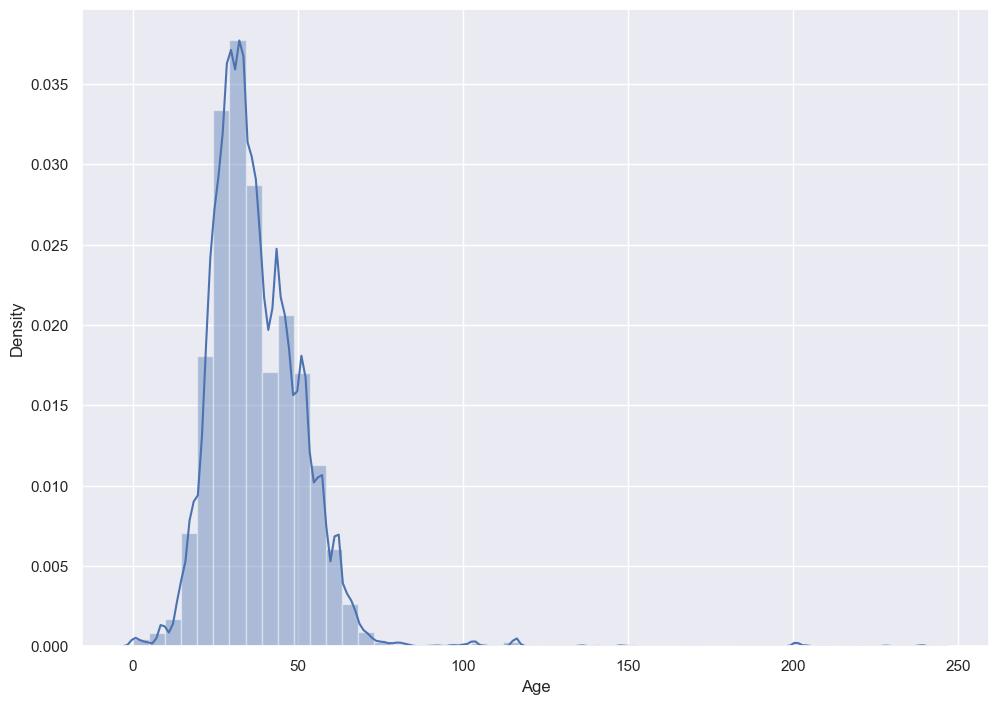

In [298]:
sns.distplot(df_merged['Age'].dropna())
# Handling outliers by randomly replacing age >90 by values between 90 and 100
age2 = df_merged['Age'].copy()
random_age2 = np.random.randint(90,100,outliers)
age2[df_merged['Age']>100]=random_age2
df_merged['Age'] = age2
plt.show()

In [299]:
# Missing Value Count Function
def show_missing(y):
    missing = y.columns[y.isnull().any()].tolist()
    return missing

def print_missing(x):
  # Missing data counts and percentage
  print('Missing Data Count')
  print(x[show_missing(x)].isnull().sum().sort_values(ascending = False))
  print('--'*50)
  print('Missing Data Percentage')
  print(round(x[show_missing(x)].isnull().sum().sort_values(ascending = False)/len(x)*100,2))

In [300]:
print_missing(df_user)

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


In [301]:

print_missing(df_books)

Missing Data Count
Image-URL-L    3
Publisher      2
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Image-URL-L    0.0
Publisher      0.0
dtype: float64


In [302]:
print_missing(df_ratings)

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [303]:
print_missing(df_location)

Missing Data Count
Age    110762
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Age    39.72
dtype: float64


In [304]:
print_missing(df_merged)

Missing Data Count
age_bins       247826
Age            245274
Image-URL-L         4
Publisher           2
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
age_bins       27.03
Age            26.75
Image-URL-L     0.00
Publisher       0.00
dtype: float64


In [305]:
# Null values in age column
nulls = sum(df_merged['Age'].isnull())
print('Null values in Age: ',nulls)

Null values in Age:  245274


In [306]:
# Replacing null values
median = df_merged['Age'].median()
std = df_merged['Age'].std()
random_age = np.random.randint(median - std, median + std, size = nulls)
age = df_merged['Age'].copy()
age[pd.isnull(age)] = random_age
df_merged['Age'] = age
df_merged['Age'] = df_merged['Age'].astype(int)

In [307]:
df_merged.shape

(916933, 15)

In [308]:

rating_count = df_merged.groupby('Book-Title')['Book-Rating'].count().to_frame()
rating_mean = df_merged.groupby('Book-Title')['Book-Rating'].mean().to_frame()

In [309]:
rating_count

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
Always Have Popsicles,1
Apple Magic (The Collector's series),1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...
Ã?Â?lpiraten.,2
Ã?Â?rger mit Produkt X. Roman.,4
Ã?Â?sterlich leben.,1


In [310]:
rating_mean

,Book-Rating
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
Always Have Popsicles,0.000000
Apple Magic (The Collector's series),0.000000
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...
Ã?Â?lpiraten.,0.000000
Ã?Â?rger mit Produkt X. Roman.,5.250000
Ã?Â?sterlich leben.,7.000000


In [311]:
# Renaming the column names before merging them with the final dataset.

rating_count.rename(columns={'Book-Rating':'Rating-Count'}, inplace=True)
rating_mean.rename(columns={'Book-Rating':'Rating-Mean'}, inplace=True)

In [312]:
rating_count

,Rating-Count
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
Always Have Popsicles,1
Apple Magic (The Collector's series),1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...
Ã?Â?lpiraten.,2
Ã?Â?rger mit Produkt X. Roman.,4
Ã?Â?sterlich leben.,1


In [313]:
rating_mean

,Rating-Mean
Book-Title,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
Always Have Popsicles,0.000000
Apple Magic (The Collector's series),0.000000
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...
Ã?Â?lpiraten.,0.000000
Ã?Â?rger mit Produkt X. Roman.,5.250000
Ã?Â?sterlich leben.,7.000000


In [314]:
df_merged = pd.merge(df_merged, rating_count, on='Book-Title', how='inner')
df_merged = pd.merge(df_merged, rating_mean, on='Book-Title', how='inner')

In [315]:
df_merged

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,28,20,NaN,60,2.933333
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,23,20,Adult,60,2.933333
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,34,20,Adult,60,2.933333
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,2,20,Kid,60,2.933333
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,36,20,NaN,60,2.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916928,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,Ludwig Marum: Briefe aus dem Konzentrationslag...,"germany""",27,55,NaN,1,5.000000
916929,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,Christmas With Anne and Other Holiday Stories:...,usa,13,72,Teenager,1,0.000000
916930,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,Heaven (Coretta Scott King Author Award Winner...,usa,13,47,Teenager,1,10.000000
916931,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,HarperCollins Publishers,http://images.amazon.com/images/P/0583307841.0...,http://images.amazon.com/images/P/0583307841.0...,http://images.amazon.com/images/P/0583307841.0...,ROBOT RACE (MICRO ADV 6) by David Antony Kroft,singapore,15,24,Teenager,1,8.000000


In [316]:
# rounding off the rating mean feature to 2 decimal points
df_merged['Rating-Mean'] = df_merged['Rating-Mean'].round(2)

In [317]:
df_merged

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,28,20,NaN,60,2.93
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,23,20,Adult,60,2.93
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,34,20,Adult,60,2.93
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,2,20,Kid,60,2.93
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,Flesh Tones: A Novel by M. J. Rose,usa,36,20,NaN,60,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916928,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,Ludwig Marum: Briefe aus dem Konzentrationslag...,"germany""",27,55,NaN,1,5.00
916929,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,Christmas With Anne and Other Holiday Stories:...,usa,13,72,Teenager,1,0.00
916930,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,Heaven (Coretta Scott King Author Award Winner...,usa,13,47,Teenager,1,10.00
916931,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,HarperCollins Publishers,http://images.amazon.com/images/P/0583307841.0...,http://images.amazon.com/images/P/0583307841.0...,http://images.amazon.com/images/P/0583307841.0...,ROBOT RACE (MICRO ADV 6) by David Antony Kroft,singapore,15,24,Teenager,1,8.00


In [318]:
df_merged.drop(columns=['Image-URL-M','Image-URL-S','Image-URL-L'],inplace=True)

In [319]:
df_merged

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,28,20,NaN,60,2.93
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,Adult,60,2.93
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,34,20,Adult,60,2.93
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,20,Kid,60,2.93
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,36,20,NaN,60,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916928,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,Ludwig Marum: Briefe aus dem Konzentrationslag...,"germany""",27,55,NaN,1,5.00
916929,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,Christmas With Anne and Other Holiday Stories:...,usa,13,72,Teenager,1,0.00
916930,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,Heaven (Coretta Scott King Author Award Winner...,usa,13,47,Teenager,1,10.00
916931,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,HarperCollins Publishers,ROBOT RACE (MICRO ADV 6) by David Antony Kroft,singapore,15,24,Teenager,1,8.00


In [320]:
df_merged.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,28,20,NaN,60,2.93
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,Adult,60,2.93
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,34,20,Adult,60,2.93
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,20,Kid,60,2.93
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,36,20,NaN,60,2.93
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,45,20,Adult,60,2.93
6,28266,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,40,20,NaN,60,2.93
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,24,20,Adult,60,2.93
8,39002,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,,29,20,NaN,60,2.93
9,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,NaN,60,2.93


In [321]:
# Using IMDB Formula to calculate the Weighted Rating for our books
# W = Rv+Cm/v+m

In [322]:
# Calculating the mean vote across the whole df
C = df_merged['Rating-Mean'].mean()

In [323]:
C

2.8254419134221482

In [324]:
# Calculating the minimum votes required to be listed in the top 5%
m = rating_count.quantile(.95)[0]

In [325]:
m

12.0

In [326]:
# IMDB formula; source: https://tutorialedge.net/python/building-imdb-top-250-clone-pandas/
def weighted_rating(x, m=m, C=C):
    v = x['Rating-Count']
    R = x['Rating-Mean']

    return (v/(v+m) * R) + (m/(m+v) * C)

In [327]:
df_merged_updated=df_merged[df_merged['Book-Rating']!=0]

In [328]:
df_merged_updated

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,Adult,60,2.93
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,20,Kid,60,2.93
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,36,20,NaN,60,2.93
9,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,NaN,60,2.93
13,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,25,20,NaN,60,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916927,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,Le Huit by Katherine Neville,switzerland,62,7,Old,1,7.00
916928,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,Ludwig Marum: Briefe aus dem Konzentrationslag...,"germany""",27,55,NaN,1,5.00
916930,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,Heaven (Coretta Scott King Author Award Winner...,usa,13,47,Teenager,1,10.00
916931,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,HarperCollins Publishers,ROBOT RACE (MICRO ADV 6) by David Antony Kroft,singapore,15,24,Teenager,1,8.00


In [329]:
print(f" Implicit dataset has {df_merged.shape[0]-df_merged_updated.shape[0]} observations")
print(f" Explicit dataset has {df_merged_updated.shape[0]} observations")

 Implicit dataset has 576893 observations
 Explicit dataset has 340040 observations


In [330]:
# Create relevant sub-dataset
df_top_10 = df_merged_updated.copy().loc[df_merged_updated['Rating-Count'] >= m]
df_top_10.shape

(163365, 14)

In [331]:
df_top_10['Score'] = df_top_10.apply(weighted_rating, axis=1)

In [332]:
df_top_10

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean,Score
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,Adult,60,2.93,2.912574
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,20,Kid,60,2.93,2.912574
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,36,20,NaN,60,2.93,2.912574
9,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,NaN,60,2.93,2.912574
13,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,25,20,NaN,60,2.93,2.912574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897646,142172,8807812576,7,La Fata Carabina,Daniel Pennac,1987,Universale Economica Feltrinelli,La Fata Carabina by Daniel Pennac,italy,31,16,NaN,12,3.75,3.287721
897648,52001,8807812576,5,La Fata Carabina,Daniel Pennac,1987,Universale Economica Feltrinelli,La Fata Carabina by Daniel Pennac,italy,41,16,NaN,12,3.75,3.287721
897651,73425,8807812576,7,La Fata Carabina,Daniel Pennac,1987,Universale Economica Feltrinelli,La Fata Carabina by Daniel Pennac,italy,42,16,NaN,12,3.75,3.287721
897653,89762,8807812576,8,La Fata Carabina,Daniel Pennac,1987,Universale Economica Feltrinelli,La Fata Carabina by Daniel Pennac,italy,33,16,NaN,12,3.75,3.287721


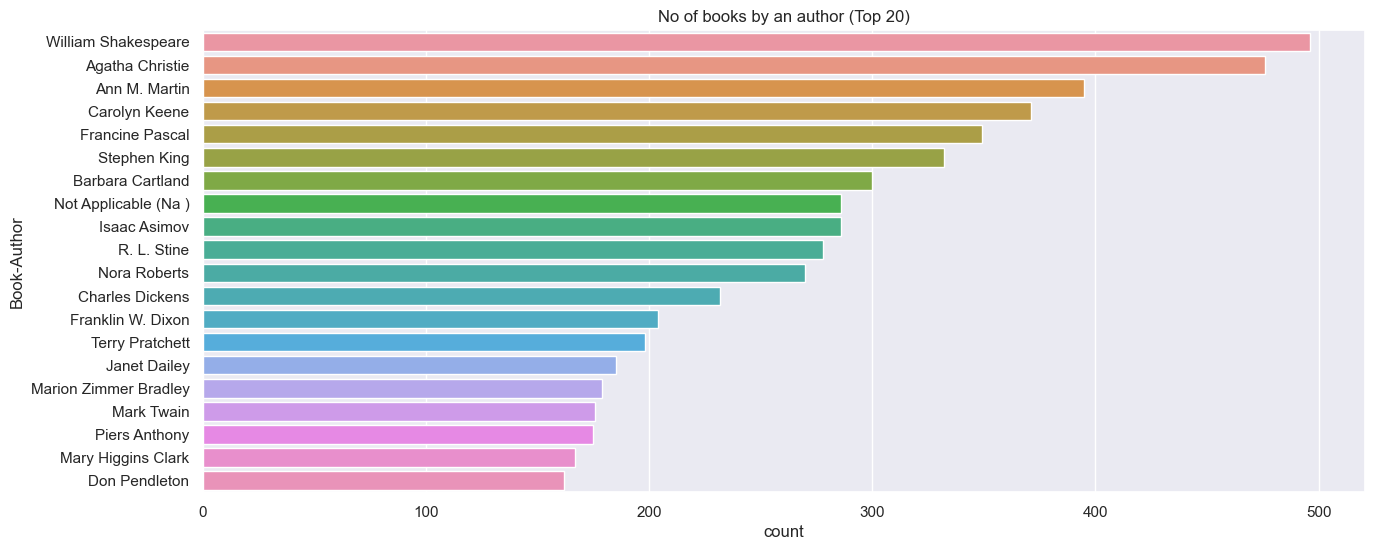

In [333]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=df_books,order=df_books['Book-Author'].value_counts().index[0:20])
plt.title("No of books by an author (Top 20)")
plt.show()
sns.set_style('darkgrid')

In [334]:
rating_count=df_ratings['Book-Rating'].value_counts().reset_index().sort_values('Book-Rating',ascending=False)

C:\Users\Vinay Mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


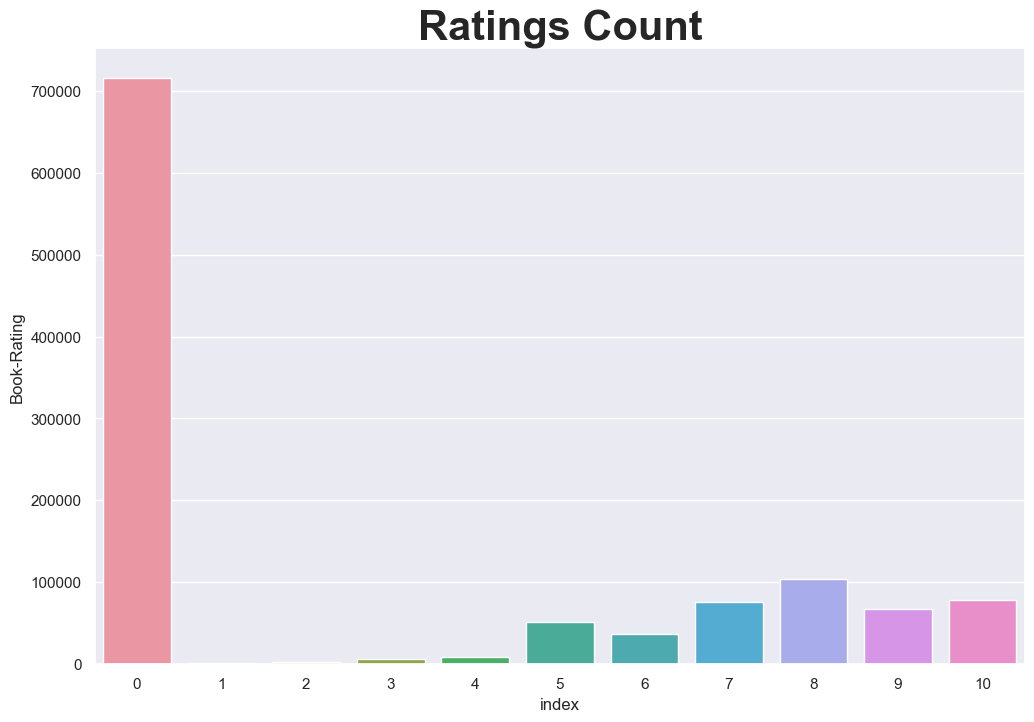

In [335]:
plt.figure(figsize=(12,8))
ax=sns.barplot(rating_count['index'],rating_count['Book-Rating'])
ax.set_title('Ratings Count',fontsize=30,fontweight='bold')
plt.show()

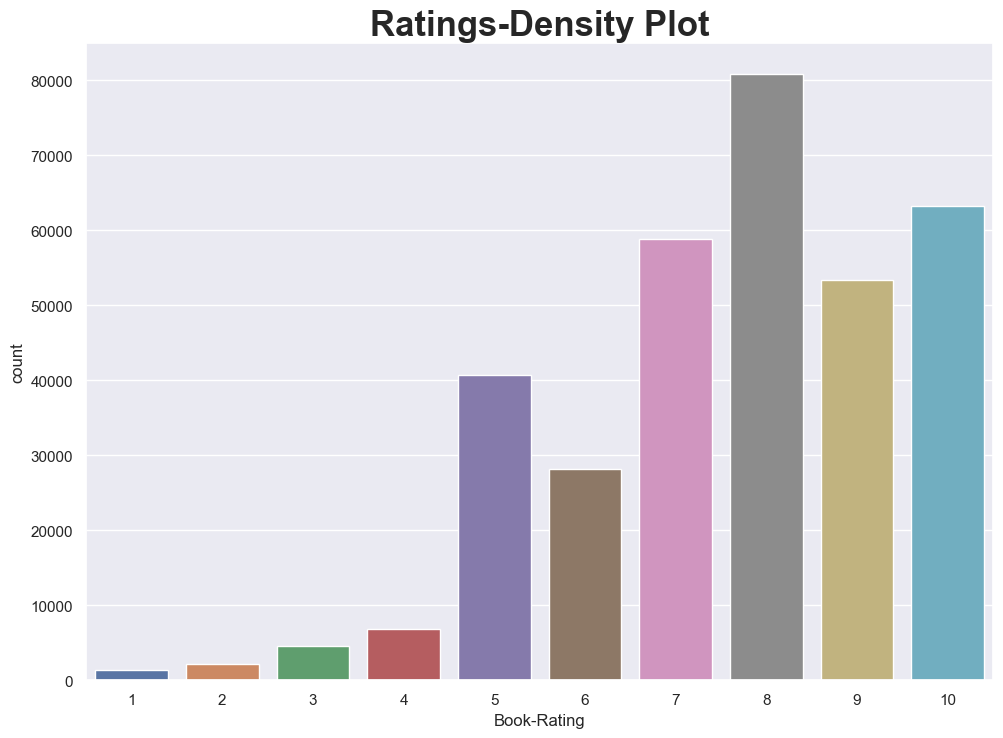

In [336]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# df_merged_updated = df_merged_updated[df_merged['Book-Rating']!=0]
sns.countplot(x='Book-Rating', data=df_merged_updated).set_title('Ratings-Density Plot', weight='bold').set_fontsize('25')
plt.show()

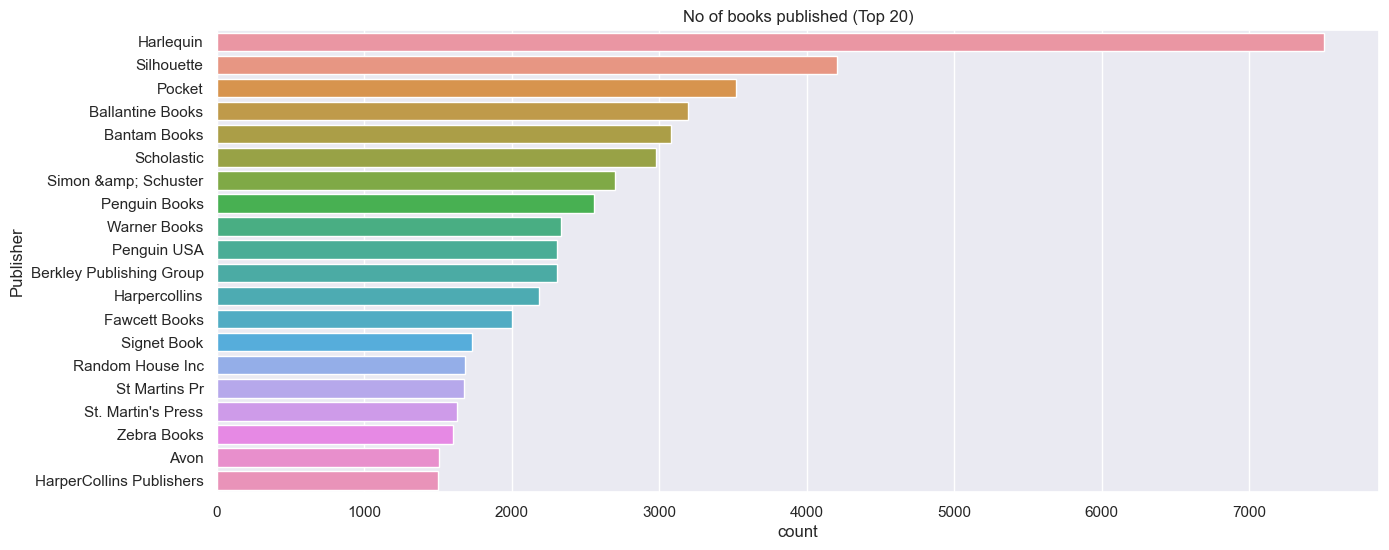

In [337]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=df_books,order=df_books['Publisher'].value_counts().index[0:20])
plt.title("No of books published (Top 20)")
plt.show()

In [338]:
#Book ratings count using group by
book_rating=df_merged.groupby(['Book-Title'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

In [339]:
book_rating

,Book-Title,Book-Rating
0,Wild Animus,2502
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,887
3,A Painted House,831
4,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
...,...,...
241056,Quentin Durward (World's Classics),1
241057,"Quentin Crisp's Book of Quotations: 1,000 Obse...",1
241058,Etiquette for Men (Etiquette S.),1
241059,Quench not the spirit,1


C:\Users\Vinay Mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


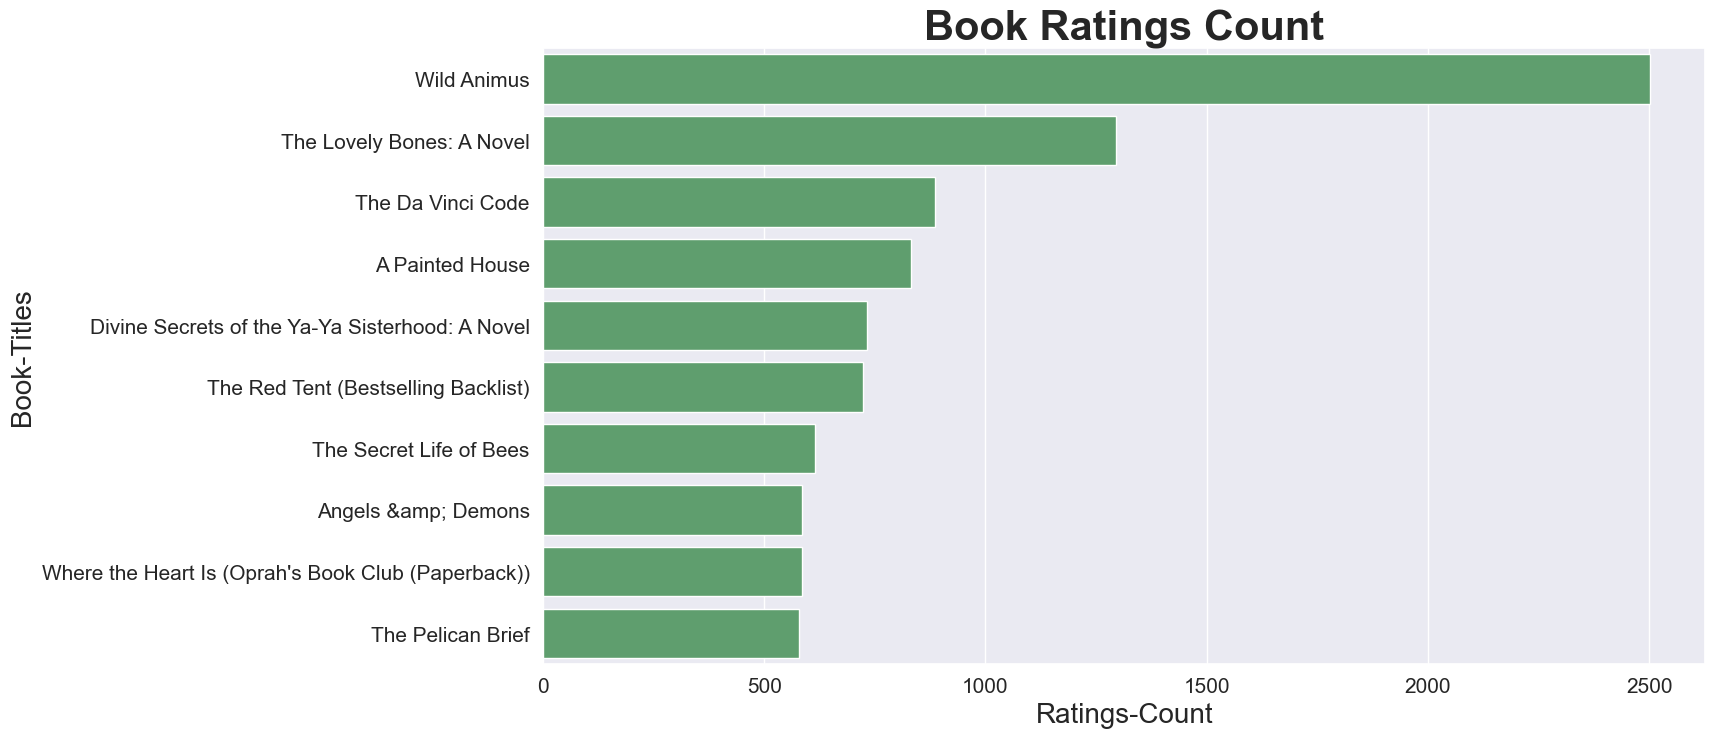

In [340]:
plt.figure(figsize=(15,8))
ax=sns.barplot(book_rating['Book-Rating'][:10],book_rating['Book-Title'][:10],color='g')
ax.set_title('Book Ratings Count', fontsize=30,fontweight='bold')
ax.set_xlabel('Ratings-Count',fontsize=20)
ax.set_ylabel('Book-Titles',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [341]:
df_location = pd.DataFrame(df_location.country.value_counts(normalize=True)).reset_index()
df_location.columns = ['countries','value_counts']
df_location['countries'] = df_location.apply(lambda x: 'other' if (x['value_counts'] < 0.01 or x['countries'] == '') else x['countries'],axis=1)
df_location = df_location.groupby('countries')['value_counts'].sum().reset_index()

In [342]:
#Every country has now just one occurance
df_location.countries.value_counts()

 australia         1
 canada            1
 france            1
 germany           1
 italy             1
 netherlands       1
 new zealand       1
 portugal          1
 spain             1
 united kingdom    1
 usa               1
other              1
Name: countries, dtype: int64

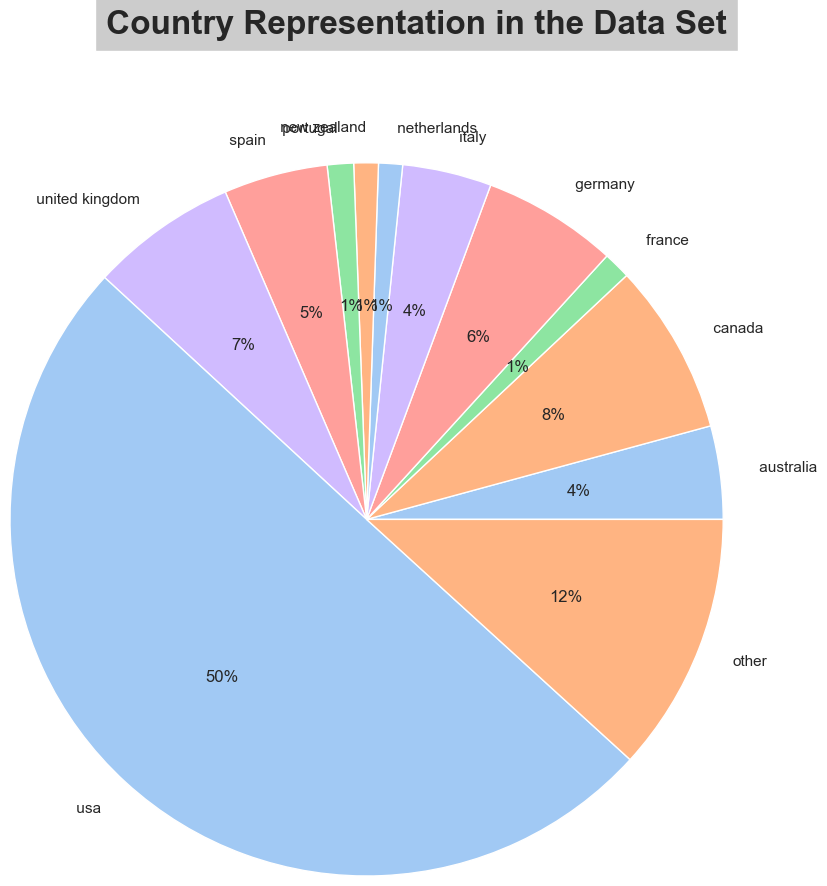

In [343]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.title("Country Representation in the Data Set",bbox={'facecolor':'0.8', 'pad':8},fontsize=24, fontdict={"weight": "bold"},y=1.25,x=0.578)
f = plt.pie(df_location['value_counts'], labels = df_location['countries'], colors = colors, autopct='%.0f%%',radius=1.4)
plt.show()

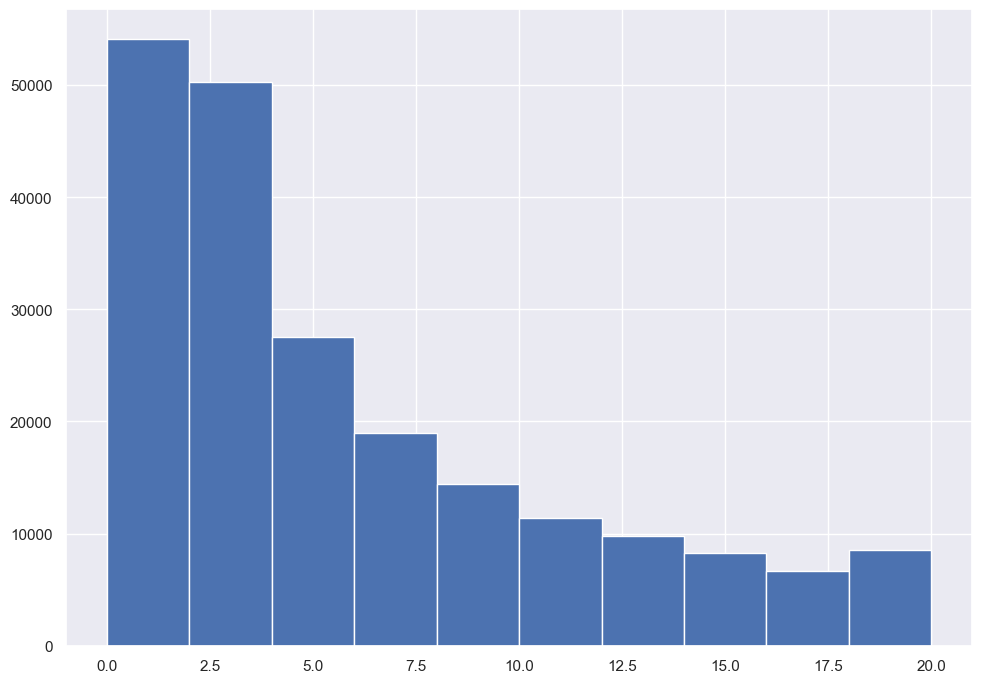

In [344]:
# Visualizing the rating counts of the users in the range between 0 to 20. 
df_merged_updated['Rating-Count'].hist(bins=[0,2,4,6,8,10,12,14,16,18,20])
plt.show()

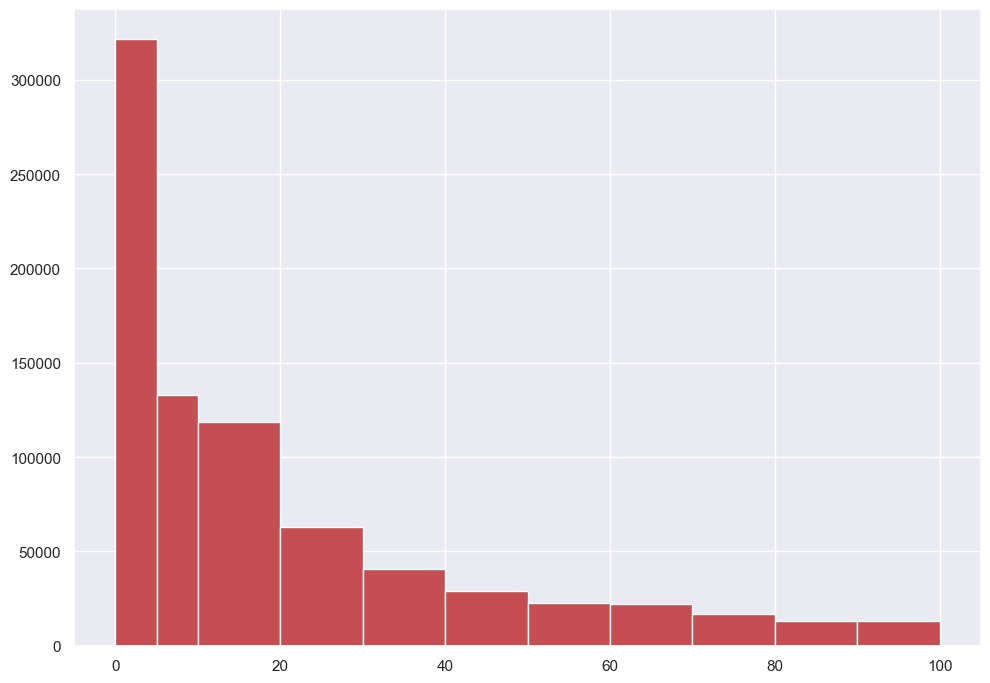

In [345]:
df_merged['Rating-Count'].hist(bins=[0,5,10,20,30,40,50,60,70,80,90,100],color='r')
plt.show()

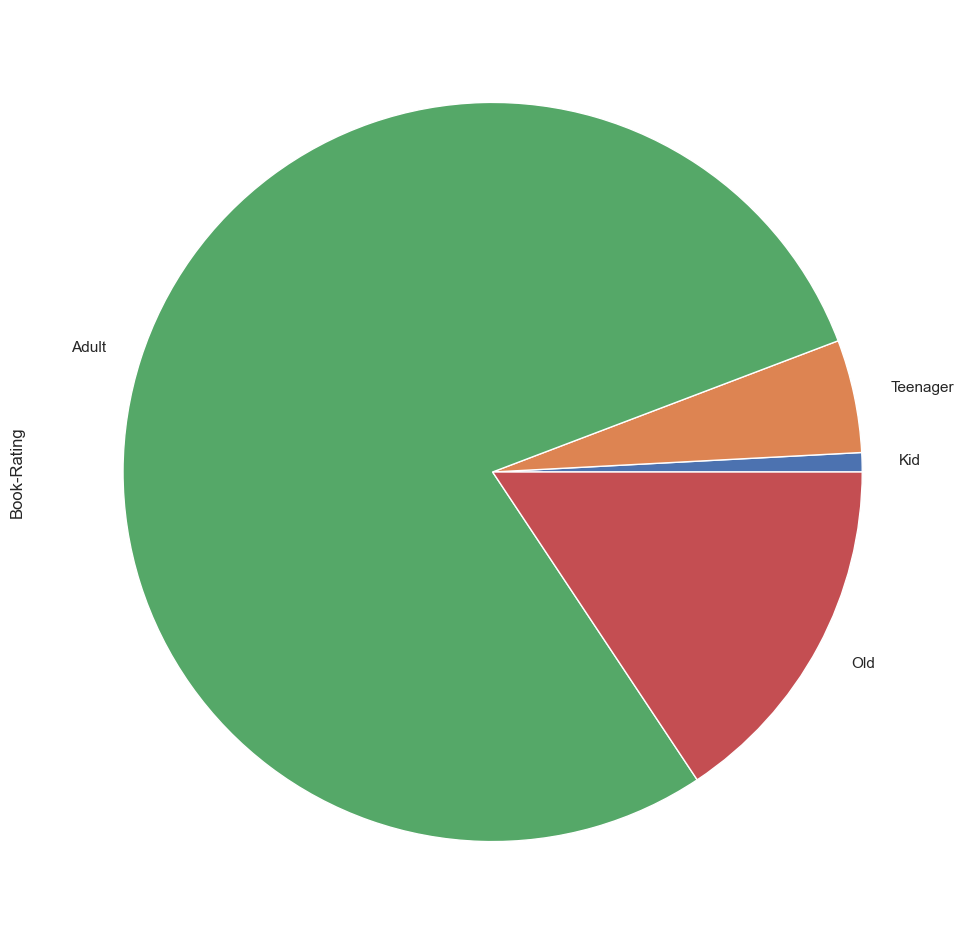

In [346]:
# Age group that rated books the most
plt.figure(figsize=(20,12))
df_merged.groupby('age_bins')['Book-Rating'].count().plot(kind='pie')
plt.show()

In [347]:
b1 = df_merged.groupby('Location')['Book-Rating'].count().sort_values(ascending=False).head(5)
b1

Location
 usa               660618
 canada             82214
 united kingdom     29795
 germany            26024
                    21364
Name: Book-Rating, dtype: int64

In [348]:
df_merged

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,28,20,NaN,60,2.93
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,Adult,60,2.93
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,34,20,Adult,60,2.93
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,20,Kid,60,2.93
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,36,20,NaN,60,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916928,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,Ludwig Marum: Briefe aus dem Konzentrationslag...,"germany""",27,55,NaN,1,5.00
916929,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,Christmas With Anne and Other Holiday Stories:...,usa,13,72,Teenager,1,0.00
916930,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,Heaven (Coretta Scott King Author Award Winner...,usa,13,47,Teenager,1,10.00
916931,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,HarperCollins Publishers,ROBOT RACE (MICRO ADV 6) by David Antony Kroft,singapore,15,24,Teenager,1,8.00


In [349]:
b1

Location
 usa               660618
 canada             82214
 united kingdom     29795
 germany            26024
                    21364
Name: Book-Rating, dtype: int64

In [350]:
# Implicit ratings i.e. Book-Rating = 0
b2 = df_merged[df_merged['Book-Rating']==0].\
groupby('Location')['Book-Rating'].count().sort_values(ascending=False).head(5)

In [351]:
b2

Location
 usa               429979
 canada             50821
 united kingdom     16334
 germany            14596
                    12156
Name: Book-Rating, dtype: int64

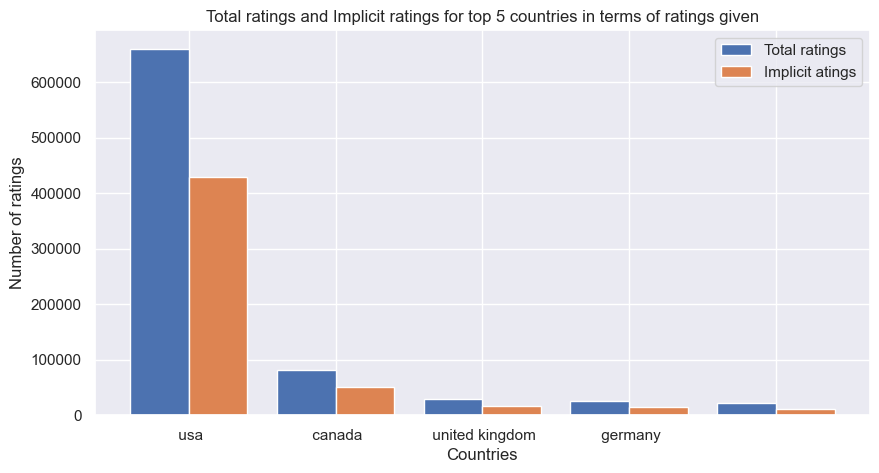

In [352]:
# Bar plot for Rating comparison 
n= 5
X_axis = np.arange(n)
X = b1.index

plt.figure(figsize=(10,5))  
plt.bar(X_axis - 0.2, b1, 0.4, label = 'Total ratings')
plt.bar(X_axis + 0.2, b2, 0.4, label = 'Implicit atings')
  
plt.xticks(X_axis, X)
plt.xlabel("Countries")
plt.ylabel("Number of ratings")
plt.title("Total ratings and Implicit ratings for top 5 countries in terms of ratings given")
plt.legend()
plt.show()

In [353]:
# Most popular books for different age groups
age_bin_df = df_merged.groupby(['age_bins','Book-Title'])['Book-Rating'].count().sort_values(ascending=False).reset_index()
age_bin_df.rename(columns={'Book-Title':'Number of times rated'},inplace=True)

In [354]:
age_bin_df

,age_bins,Number of times rated,Book-Rating
0,Adult,Wild Animus,1606
1,Adult,The Lovely Bones: A Novel,749
2,Adult,The Da Vinci Code,540
3,Adult,Divine Secrets of the Ya-Ya Sisterhood: A Novel,423
4,Adult,The Red Tent (Bestselling Backlist),391
...,...,...,...
964239,Teenager,Gus and the Baby Ghost,0
964240,Teenager,Gus the Greedy Puppy (Puppy Friends),0
964241,Teenager,Gust Front,0
964242,Teenager,Gustaf GrÃ¼ndgens: In Selbstzeugnissen und Bil...,0


In [355]:
# Visually inspecting this feature by observing it's unique values.
df_merged_updated['Year-Of-Publication'].unique()

array([2002, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970,    0, 1978,
       1993, 1989, 1995, 1990, 1957, 1992, 1950, 1991, 1999, 1954, 1988,
       2003, 2004, 1977, 2000, 1983, 1985, 1986, 1982, 1956, 1979, 1976,
       1981, 1980, 1974, 1958, 1960, 1963, 1969, 1971, 1973, 1972, 1961,
       1953, 1962, 1937, 1968, 1959, 1955, 2005, 1975, 1965, 1920, 1943,
       1964, 1967, 1927, 2020, 2050, 1952, 1966, 1930, 1940, 1942, 1946,
       1947, 1925, 1923, 2030, 1936, 1928, 1941, 1951, 1901, 2011, 1939,
       1945, 1932, 1902, 1929, 1911, 1949, 1926, 2026, 1906, 1806, 1933,
       1935, 1938, 2006, 2037, 1948, 2099, 2038, 1900, 1904, 1924, 1378,
       1934, 1944, 1931, 1376, 1908], dtype=int64)

In [356]:
# Casting Year-Of-Publication to numeric datatype and removing all String Noice Values using coerce functionality.

df_merged_updated['Year-Of-Publication'] = pd.to_numeric(df_merged_updated['Year-Of-Publication'], 'coerce')

<ipython-input-356-a07179142885>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_updated['Year-Of-Publication'] = pd.to_numeric(df_merged_updated['Year-Of-Publication'], 'coerce')


In [357]:
df_merged_updated

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,Adult,60,2.93
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,20,Kid,60,2.93
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,36,20,NaN,60,2.93
9,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,NaN,60,2.93
13,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,25,20,NaN,60,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916927,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,Le Huit by Katherine Neville,switzerland,62,7,Old,1,7.00
916928,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,Ludwig Marum: Briefe aus dem Konzentrationslag...,"germany""",27,55,NaN,1,5.00
916930,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,Heaven (Coretta Scott King Author Award Winner...,usa,13,47,Teenager,1,10.00
916931,276660,0583307841,8,ROBOT RACE (MICRO ADV 6),David Antony Kroft,1985,HarperCollins Publishers,ROBOT RACE (MICRO ADV 6) by David Antony Kroft,singapore,15,24,Teenager,1,8.00


In [358]:
# Cross checking the column to check if the string based noice values are removed or not.
df_merged_updated['Year-Of-Publication'].unique()

array([2002, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970,    0, 1978,
       1993, 1989, 1995, 1990, 1957, 1992, 1950, 1991, 1999, 1954, 1988,
       2003, 2004, 1977, 2000, 1983, 1985, 1986, 1982, 1956, 1979, 1976,
       1981, 1980, 1974, 1958, 1960, 1963, 1969, 1971, 1973, 1972, 1961,
       1953, 1962, 1937, 1968, 1959, 1955, 2005, 1975, 1965, 1920, 1943,
       1964, 1967, 1927, 2020, 2050, 1952, 1966, 1930, 1940, 1942, 1946,
       1947, 1925, 1923, 2030, 1936, 1928, 1941, 1951, 1901, 2011, 1939,
       1945, 1932, 1902, 1929, 1911, 1949, 1926, 2026, 1906, 1806, 1933,
       1935, 1938, 2006, 2037, 1948, 2099, 2038, 1900, 1904, 1924, 1378,
       1934, 1944, 1931, 1376, 1908], dtype=int64)

In [359]:
# Removing all the integer Noice Values from the Dataset.
df_merged_updated = df_merged_updated[(df_merged_updated['Year-Of-Publication']<=2022)]
df_merged_updated.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,Adult,60,2.93
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,20,Kid,60,2.93


In [360]:
df_merged_updated['Year-Of-Publication'].unique()

array([2002, 1994, 1996, 1998, 2001, 1987, 1984, 1997, 1970,    0, 1978,
       1993, 1989, 1995, 1990, 1957, 1992, 1950, 1991, 1999, 1954, 1988,
       2003, 2004, 1977, 2000, 1983, 1985, 1986, 1982, 1956, 1979, 1976,
       1981, 1980, 1974, 1958, 1960, 1963, 1969, 1971, 1973, 1972, 1961,
       1953, 1962, 1937, 1968, 1959, 1955, 2005, 1975, 1965, 1920, 1943,
       1964, 1967, 1927, 2020, 1952, 1966, 1930, 1940, 1942, 1946, 1947,
       1925, 1923, 1936, 1928, 1941, 1951, 1901, 2011, 1939, 1945, 1932,
       1902, 1929, 1911, 1949, 1926, 1906, 1806, 1933, 1935, 1938, 2006,
       1948, 1900, 1904, 1924, 1378, 1934, 1944, 1931, 1376, 1908],
      dtype=int64)

In [361]:
# The percentage of Data lost while cleaning the Year-of_publication Feature.
percentage_of_data_lost = (340040 - df_merged_updated.shape[0])*100/340040
percentage_of_data_lost

0.007352076226326314

In [362]:
# counting the ratings per ISBN
books_reduce=df_merged_updated.groupby(['ISBN'])['Book-Rating'].count().reset_index().sort_values('Book-Rating',ascending=False)

In [363]:
books_reduce

,ISBN,Book-Rating
19902,0316666343,707
107032,0971880107,581
35352,0385504209,487
16404,0312195516,383
3653,0060928336,320
...,...,...
57544,0553251147,1
57542,0553251112,1
57541,0553251104,1
57539,0553250965,1


In [364]:
#Considering all the counts greater than 10
reduced_books=books_reduce[books_reduce['Book-Rating']>10]['ISBN']

In [365]:
reduced_books

19902     0316666343
107032    0971880107
35352     0385504209
16404     0312195516
3653      0060928336
             ...    
38767     0399149775
38544     039914112X
114155    1571458735
51474     0452281091
42336     0440177049
Name: ISBN, Length: 4082, dtype: object

In [366]:
#merging it with the original dataset
df_merged_updated=df_merged_updated.merge(reduced_books,how='inner',left_on='ISBN',right_on='ISBN')

In [367]:
df_merged_updated

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,new_title,Location,Age,Title-Length,age_bins,Rating-Count,Rating-Mean
0,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,Adult,60,2.93
1,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,2,20,Kid,60,2.93
2,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,36,20,NaN,60,2.93
3,50403,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,23,20,NaN,60,2.93
4,63970,034545104X,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,Flesh Tones: A Novel by M. J. Rose,usa,25,20,NaN,60,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112922,121043,0615116426,10,Marching Through Culpeper : A Novel of Culpepe...,Virginia Beard Morton,2000,Edgehill Books,Marching Through Culpeper : A Novel of Culpepe...,usa,35,86,NaN,15,8.07
112923,121152,0615116426,7,Marching Through Culpeper : A Novel of Culpepe...,Virginia Beard Morton,2000,Edgehill Books,Marching Through Culpeper : A Novel of Culpepe...,usa,24,86,NaN,15,8.07
112924,124097,0615116426,9,Marching Through Culpeper : A Novel of Culpepe...,Virginia Beard Morton,2000,Edgehill Books,Marching Through Culpeper : A Novel of Culpepe...,usa,37,86,NaN,15,8.07
112925,192858,0615116426,8,Marching Through Culpeper : A Novel of Culpepe...,Virginia Beard Morton,2000,Edgehill Books,Marching Through Culpeper : A Novel of Culpepe...,usa,30,86,NaN,15,8.07


In [368]:
df_merged_updated.shape

(112927, 14)

In [369]:
# Size of dataset rows before the User selection operation.
df_size_before_removing_Novice_readers = df_merged_updated.shape[0]
df_size_before_removing_Novice_readers

112927

In [370]:
# Storing the value counts of User-ID's in a new variable named counts1
counts1 = df_merged_updated['User-ID'].value_counts()

# Removing the User-ID's which have rated less than 10 books.
df_merged_updated= df_merged_updated[df_merged_updated['User-ID'].isin(counts1[counts1 >=10].index)].reset_index()
df_merged_updated.drop(columns='index', inplace=True)

In [371]:
df_merged_updated.shape

(51937, 14)

In [372]:
# Size of dataset rows after the User selection operation.
df_size_after_removing_Novice_readers = df_merged_updated.shape[0]
df_size_after_removing_Novice_readers

51937

In [373]:
df_merged_updated.shape

(51937, 14)

# Model Building

In [378]:
# top 10 rated books based on the Rating-Mean colummn

top_rated = df_merged_updated[['Book-Title', 'Rating-Mean']]
top_rated = top_rated.groupby(['Book-Title'])['Rating-Mean'].mean().to_frame()
top_rated.sort_values(by='Rating-Mean', ascending=False).head(10)

,Rating-Mean
Book-Title,
The Blue Day Book: A Lesson in Cheering Yourself Up,9.18
The Baby Book: Everything You Need to Know About Your Baby from Birth to Age Two,8.46
Die unendliche Geschichte: Von A bis Z,8.07
Free,8.02
Harry Potter y el cÃ¡liz de fuego,7.88
There's Treasure Everywhere--A Calvin and Hobbes Collection,7.88
Warchild,7.62
"Jesus Freaks: DC Talk and The Voice of the Martyrs - Stories of Those Who Stood For Jesus, the Ultimate Jesus Freaks",7.53
El Hobbit,7.48


In [379]:
# Recommending Books Based Upon Authors:-
@interact
def recommend_books_based_upon_author( Book_Author = list(df_top_10['Book-Author'].value_counts().index)):
  a = df_top_10[df_top_10['Book-Author']==Book_Author][['Book-Title', 'Rating-Mean']]
  a = a.groupby(['Book-Title'])['Rating-Mean'].mean().to_frame()
  a = a.sort_values(by = 'Rating-Mean', ascending=False)
  return a.head(10)


interactive(children=(Dropdown(description='Book_Author', options=('Nora Roberts', 'Stephen King', 'James Patt…

# Memory based KNN Model

In [380]:
df_Knn = df_merged_updated.copy(deep=True)

In [381]:
df_Knn['Score'] = df_merged_updated.apply(weighted_rating, axis=1)

In [382]:
df_Knn.drop(columns=['ISBN',	'Book-Author',	'Year-Of-Publication',	'Publisher','Age','Location', 'Book-Rating', 'Rating-Count', 'Rating-Mean','Book-Title','Title-Length','age_bins'], inplace=True)


In [383]:
# Calculating the total number of books in the dataset and the number of books used in the recommendation system.

Number_of_books_in_dataset = len(df_books['Book-Title'].unique())
Number_of_books_considered_for_recommendation = len(df_Knn['new_title'].unique())

In [384]:
# Percentage of books considered for recommendation.

per_books_in_recommendation_system = (Number_of_books_considered_for_recommendation*100)/Number_of_books_in_dataset
per_books_in_recommendation_system

1.6755115947715118

In [385]:
# Building the Final dataframe for the KNN Model.
df_final = pd.pivot_table(data=df_Knn, index='new_title', columns='User-ID', values='Score').fillna(0)

In [386]:
df_final.shape

(4057, 2137)

In [387]:
 df_final.head(2)

User-ID,243,254,507,638,805,882,929,1025,1131,1424,...,277945,278026,278137,278188,278194,278418,278535,278582,278633,278843
new_title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot by Stephen King,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"14,000 Things to Be Happy About by Barbara Ann Kipfer",0.0,0.0,0.0,0.0,0.0,0.0,3.549633,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
# converting the sparse matrix into condensed matrix using scipy.sparse functionality.
df_matrix = csr_matrix(df_final.values)

In [389]:
# Building a KNN model with Cosine Similarity as the target metric for calculating the distances.
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=5)
model_knn.fit(df_final)

NearestNeighbors(algorithm='brute', metric='cosine')

In [390]:
# Building item to item recommendation model for the book readers
def recommend(movie, n_values=11):
  distances, indices = model_knn.kneighbors(df_final.loc[movie,:].values.reshape(1, -1), n_neighbors = n_values)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'The Top {n_values - 1} Recommendations for Users who have read book {movie} are shown below:-')
    else:
        print('{0}: {1}, with distance of {2}.'.format(i, df_final.index[indices.flatten()[i]], distances.flatten()[i]))

In [392]:
recommend('9-11 by Noam Chomsky', n_values=11)

The Top 10 Recommendations for Users who have read book 9-11 by Noam Chomsky are shown below:-
1: Maggie Needs an Alibi by Kasey Michaels, with distance of 0.6220355269907728.
2: Due di due (Bestsellers) by Andrea De Carlo, with distance of 0.6220355269907728.
3: Ravage by Rene Barjavel, with distance of 0.6220355269907728.
4: Schachnovelle by Stefan Zweig, with distance of 0.6220355269907728.
5: MÃ?Â¶rder ohne Gesicht. by Henning Mankell, with distance of 0.6220355269907728.
6: Generation X. Geschichten fÃ?Â¼r eine immer schneller werdende Kultur. by Douglas Coupland, with distance of 0.6220355269907728.
7: Oceano Mare by Alessandro Baricco, with distance of 0.6220355269907728.
8: Novocento, Un Monologo by Alessandro Baricco, with distance of 0.6220355269907728.
9: Die Firma. Roman. by John Grisham, with distance of 0.6220355269907728.
10: Warum MÃ?Â¤nner nicht zuhÃ?Â¶ren und Frauen schlecht einparken. by Allan Pease, with distance of 0.6220355269907728.


In [404]:
recommend('Maggie Needs an Alibi by Kasey Michaels')

The Top 10 Recommendations for Users who have read book Maggie Needs an Alibi by Kasey Michaels are shown below:-
1: Free by Paul Vincent, with distance of 0.5.
2: Die Firma. Roman. by John Grisham, with distance of 0.5.
3: Schlafes Bruder by Robert Schneider, with distance of 0.5.
4: Schachnovelle by Stefan Zweig, with distance of 0.5.
5: The First Counsel by Brad Meltzer, with distance of 0.5.
6: Warum MÃ?Â¤nner nicht zuhÃ?Â¶ren und Frauen schlecht einparken. by Allan Pease, with distance of 0.5.
7: Das Echo. by Minette Walters, with distance of 0.5.
8: MÃ?Â¶rder ohne Gesicht. by Henning Mankell, with distance of 0.5.
9: UN Viejo Que Leia Novelas De Amor/the Old Men Who Read Love Stories (ColecciÃ³n Andanzas) by Luis Sepulveda, with distance of 0.5.
10: Jade Peony by Wayson Choy, with distance of 0.5.


In [405]:
recommend('Jade Peony by Wayson Choy')

The Top 10 Recommendations for Users who have read book Jade Peony by Wayson Choy are shown below:-
1: The First Counsel by Brad Meltzer, with distance of 0.0.
2: Generation X. Geschichten fÃ?Â¼r eine immer schneller werdende Kultur. by Douglas Coupland, with distance of 0.0.
3: Ravage by Rene Barjavel, with distance of 0.0.
4: Die Weiss Lowin / Contemporary German Lit by Henning Mankell, with distance of 0.0.
5: Schlafes Bruder by Robert Schneider, with distance of 0.0.
6: Due di due (Bestsellers) by Andrea De Carlo, with distance of 0.0.
7: Jade Peony by Wayson Choy, with distance of 0.0.
8: Der Alchimist. by Paulo Coelho, with distance of 0.0.
9: Garden of Rama by Arthur C. Clarke, with distance of 0.0.
10: Die Firma. Roman. by John Grisham, with distance of 0.0.


## Collaborative Filtering Model

In [396]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = df_merged_updated.groupby(['User-ID','Book-Title'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head(2)

# of unique user/item interactions: 51904


,User-ID,Book-Title,Book-Rating
0,243,A Monk Swimming,2.584963
1,243,A Painted House,3.000000


In [397]:
le = preprocessing.LabelEncoder()
le.fit(interactions_full_df['Book-Title'].unique())

LabelEncoder()

In [398]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df, 
                                   test_size=0.20,
                                   stratify=interactions_full_df['User-ID'],
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 41523
# interactions on Test set: 10381


In [399]:
interactions_train_df['Book-Title'] = le.transform(interactions_train_df['Book-Title'])
interactions_test_df['Book-Title'] = le.transform(interactions_test_df['Book-Title'])

interactions_train_df.head()

<ipython-input-399-2ea4eab90dfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions_train_df['Book-Title'] = le.transform(interactions_train_df['Book-Title'])
<ipython-input-399-2ea4eab90dfb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions_test_df['Book-Title'] = le.transform(interactions_test_df['Book-Title'])


,User-ID,Book-Title,Book-Rating
31624,164027,3519,3.459432
31008,160819,1875,3.459432
12536,64310,2664,3.459432
49143,261998,2700,3.169925
35192,184532,2016,3.459432


In [400]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='Book-Title', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head(2)

Book-Title,0,1,2,3,4,5,6,7,8,9,...,3978,3979,3980,3981,3982,3983,3984,3985,3986,3987
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [401]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [402]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[243, 254, 507, 638, 805, 882, 929, 1025, 1131, 1424]